In [17]:

#Je prétraite mes données pour obtenir mes données d'abondance à l'image de ce que propose le logiciel "Copia"

import pandas as pd
import numpy as np
from collections import namedtuple

df = pd.read_excel('C:\\Users\\ADMIN\Desktop\\Ecole_des_Chartes\\Memoire_2\\manuscripts_data_2\\manuscripts_data_vr\\wits_table4.xlsx')

# Je compte les occurrences de chaque titre puis combien de titres différents ont été observés (les oeuvres ici sont les espèces)
title_counts = df['workTitle'].value_counts()
S_obs = len(title_counts)

#Je calcule le nombre de singletons et doubletons et le nombre total de titres pour obtenir le nombre total d'individus de mon échantillon
f1 = sum(title_counts == 1)
f2 = sum(title_counts == 2)
n = len(df['workTitle'])

 #je créé ma structure de données
counts = np.array(title_counts)
AbundanceData = namedtuple('AbundanceData', ['S_obs', 'f1', 'f2', 'n', 'counts'])
abundance_data = AbundanceData(S_obs=S_obs, f1=f1, f2=f2, n=n, counts=counts)
print(abundance_data)

<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17016\1516325864.py:7: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_excel('C:\\Users\\ADMIN\Desktop\\Ecole_des_Chartes\\Memoire_2\\manuscripts_data_2\\manuscripts_data_vr\\wits_table4.xlsx')


AbundanceData(S_obs=57, f1=9, f2=3, n=1312, counts=array([90, 77, 72, 63, 62, 54, 54, 54, 54, 54, 54, 54, 54, 52, 43, 37, 30,
       29, 28, 25, 25, 22, 19, 18, 16, 14, 13, 11, 11, 10, 10, 10, 10,  9,
        7,  7,  6,  6,  6,  6,  5,  5,  4,  3,  3,  2,  2,  2,  1,  1,  1,
        1,  1,  1,  1,  1,  1], dtype=int64))


Je vais appliquer désormais différents estimateurs de richesse.

Chao1 estimation: 70.5
ACE estimation: 65.93821510297482
Jackknife estimation: 57.02750190985485
Abundance Data: AbundanceData(S_obs=57, f1=9, f2=3, n=1312, counts=array([90, 77, 72, 63, 62, 54, 54, 54, 54, 54, 54, 54, 54, 52, 43, 37, 30,
       29, 28, 25, 25, 22, 19, 18, 16, 14, 13, 11, 11, 10, 10, 10, 10,  9,
        7,  7,  6,  6,  6,  6,  5,  5,  4,  3,  3,  2,  2,  2,  1,  1,  1,
        1,  1,  1,  1,  1,  1], dtype=int64))
Taux de survie des œuvres: 0.4470588235294118


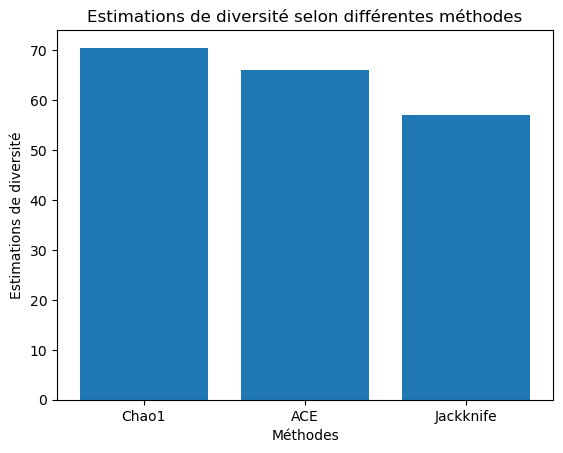

In [20]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import namedtuple, Counter


df = pd.read_excel('C:\\Users\\ADMIN\\Desktop\\Ecole_des_Chartes\\Memoire_2\\manuscripts_data_2\\manuscripts_data_vr\\wits_table4.xlsx')

# Je définis chaque fonction des estimateurs de richesse : à chaque fois je reprends la formule basique que l'on trouve pour ces estimateurs. J'indique dans mon Mémoire mes sources qui sont principalement des articles de Anne Chao bien évidemment.
def diversity(abundance_data, method):
    if method == 'chao1':
        return chao1(abundance_data)
    elif method == 'ace':
        return ace(abundance_data)
    elif method == 'jackknife':
        return jackknife(abundance_data)
    else:
        raise ValueError("Méthode non reconnue")

def chao1(data):
    if data.f2 > 0:
        S_chao1 = data.S_obs + (data.f1**2) / (2 * data.f2)
    else:
        S_chao1 = data.S_obs + (data.f1 * (data.f1 - 1)) / (2 * (data.f2 + 1))  # Utiliser une formule alternative si aucun doubleton
    return S_chao1

def ace(data):
    S_ace = data.S_obs + ((data.f1*(data.f1 - 1)) / (2 * (data.f2 + 1))) * (1 - (data.f1 / (data.n - 1)))
    return S_ace

def jackknife(data):    
    S_jackknife = data.S_obs + data.f1 * (data.f1 - 1) / (2 * (data.n - data.f2))
    return S_jackknife

def taux_survie(S_obs, S_chao1):
    return S_obs / (S_obs + S_chao1)

S_chao1 = diversity(abundance_data, method='chao1')
print("Chao1 estimation:", S_chao1)
print("ACE estimation:", diversity(abundance_data, method='ace'))
print("Jackknife estimation:", diversity(abundance_data, method='jackknife'))
print("Abundance Data:", abundance_data)

# Je créé une liste contenant les noms des méthodes d'estimation de diversité et une autre liste contenant les valeurs estimées de diversité en vue de mon future graphique
methods = ['Chao1', 'ACE', 'Jackknife']
estimations = [S_chao1, diversity(abundance_data, method='ace'), diversity(abundance_data, method='jackknife')]


# Je calcule pour finir le taux de survie des œuvres
taux = taux_survie(S_obs, S_chao1)
print("Taux de survie des œuvres:", taux)

 
plt.bar(methods, estimations)
plt.xlabel('Méthodes')
plt.ylabel('Estimations de diversité')
plt.title('Estimations de diversité selon différentes méthodes')
plt.savefig('graphiquechaowits.png')
plt.show()


